## **Importing** **Libraries**

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
stock = yf.download("MSFT", start="2012-07-25", end="2022-07-24")

[*********************100%***********************]  1 of 1 completed


In [ ]:
stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-07-25,29.24,29.330000,28.780001,28.830000,23.489498,45579500
2012-07-26,29.23,29.500000,29.090000,29.160000,23.758375,45301400
2012-07-27,29.48,29.850000,29.180000,29.760000,24.247231,44242600
2012-07-30,29.75,29.820000,29.459999,29.639999,24.149460,28905000
2012-07-31,29.48,29.709999,29.330000,29.469999,24.010948,37620900


In [ ]:
stock.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-18,259.750000,260.839996,253.300003,254.250000,253.711472,20975000
2022-07-19,257.579987,259.720001,253.679993,259.529999,258.980286,25012600
2022-07-20,259.899994,264.869995,258.910004,262.269989,261.714478,22788300
2022-07-21,259.790009,264.890015,257.029999,264.839996,264.279022,22404700
2022-07-22,265.239990,265.329987,259.070007,260.359985,259.808502,21881300


In [ ]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2012-07-25 to 2022-07-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2515 non-null   float64
 1   High       2515 non-null   float64
 2   Low        2515 non-null   float64
 3   Close      2515 non-null   float64
 4   Adj Close  2515 non-null   float64
 5   Volume     2515 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.5 KB


In [ ]:
stock.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
stock.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,112.014302,113.102982,110.863932,112.044274,107.637542,3.309392e+07
std,87.201851,88.127808,86.182173,87.202210,88.245375,1.732176e+07
min,26.379999,26.629999,26.260000,26.370001,21.805246,7.425600e+06
25%,45.000000,45.370001,44.615000,44.955000,39.387333,2.272350e+07
50%,72.400002,72.889999,72.050003,72.500000,67.838348,2.890750e+07
75%,157.415001,159.060005,156.369995,157.705002,153.960098,3.794265e+07
max,344.619995,349.670013,342.200012,343.109985,340.882782,2.484285e+08


## **EXPLORATORY** **DATA** **ANALYSIS**

### Highest Stock Price For 5 days

In [ ]:
Highest_stock = stock.sort_values(by='High',ascending= False).head(5)
Highest_stock['High']

Date
2021-11-22    349.670013
2021-11-19    345.100006
2021-12-29    344.299988
2021-12-28    343.809998
2021-12-13    343.790009
Name: High, dtype: float64

### Lowest stock price for 5 days

In [ ]:
lowest_stock = stock.sort_values(by='Low',ascending= True).head(5)
lowest_stock['Low']

Date
2012-12-05    26.260000
2013-01-11    26.280001
2013-01-10    26.290001
2012-11-16    26.340000
2012-12-04    26.340000
Name: Low, dtype: float64

### Comparing both Highest & Lowest Price over a period of time

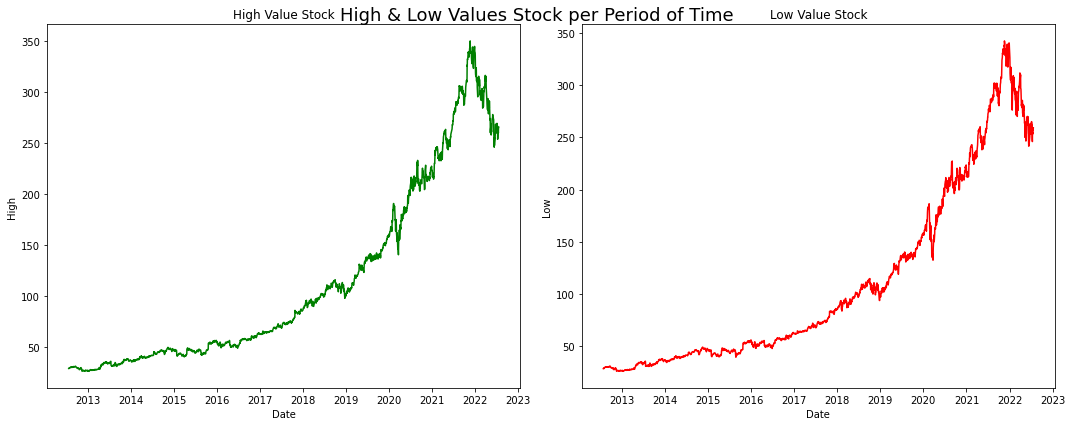

In [ ]:
fig,axes= plt.subplots(nrows=1,ncols=2, sharex=True, figsize=(15,6))
fig.suptitle('High & Low Values Stock per Period of Time',fontsize=18)
sns.lineplot(ax= axes[0], y=stock['High'],x=stock.index, color='green')
axes[0].set_title('High Value Stock')
sns.lineplot(ax= axes[1], y=stock['Low'], x=stock.index, color='red')
axes[1].set_title('Low Value Stock')
plt.tight_layout()
plt.show()

### Comparing both Volume and Closing price

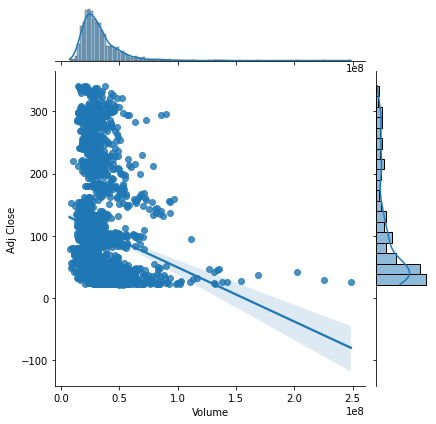

In [ ]:
sns.jointplot(x='Volume', y='Adj Close', data=stock, kind='reg');

### Closing price 

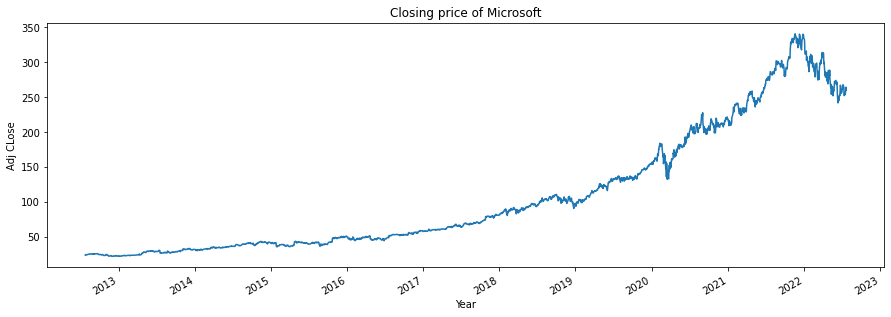

In [ ]:
plt.figure(figsize=(15,5))
stock['Adj Close'].plot()
plt.ylabel('Adj CLose')
plt.xlabel('Year')
plt.title('Closing price of Microsoft');

### Daily returns

In [ ]:
stock['Daily_returns'] = stock['Adj Close'].pct_change()

In [ ]:
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns
Date,,,,,,,
2012-07-25,29.24,29.330000,28.780001,28.830000,23.489498,45579500,NaN
2012-07-26,29.23,29.500000,29.090000,29.160000,23.758375,45301400,0.011447
2012-07-27,29.48,29.850000,29.180000,29.760000,24.247231,44242600,0.020576
2012-07-30,29.75,29.820000,29.459999,29.639999,24.149460,28905000,-0.004032
2012-07-31,29.48,29.709999,29.330000,29.469999,24.010948,37620900,-0.005736


* **Maximum** **Daily** **return**

In [ ]:
stock[stock['Daily_returns']==stock['Daily_returns'].max()]['Daily_returns']

Date
2020-03-13    0.142169
Name: Daily_returns, dtype: float64

* **Minimum** **Daily** **return**

In [ ]:
stock[stock['Daily_returns']==stock['Daily_returns'].min()]['Daily_returns']

Date
2020-03-16   -0.14739
Name: Daily_returns, dtype: float64

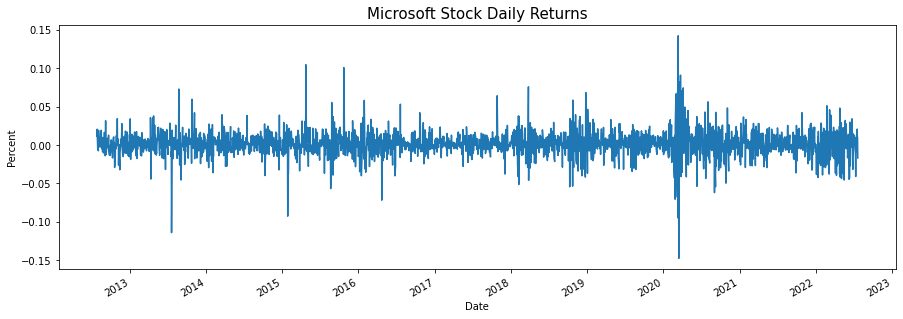

In [ ]:
plt.figure(figsize=(15,5))
stock['Daily_returns'].plot()
plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("Microsoft Stock Daily Returns",fontsize= 15 );

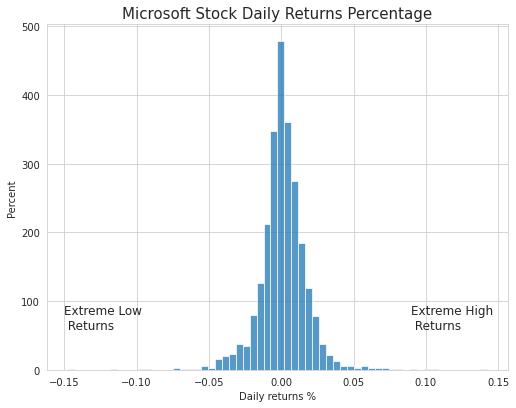

In [ ]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
sns.histplot(data= stock['Daily_returns'], bins=60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Microsoft Stock Daily Returns Percentage",fontsize= 15 )
ax1.text(-0.15,60,"Extreme Low\n Returns",fontsize= 12)
ax1.text(0.09,60,"Extreme High\n Returns", fontsize= 12)
plt.show()

### Sales Volume

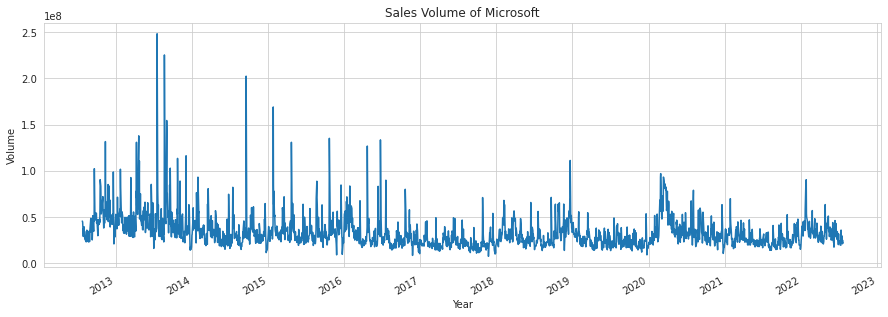

In [ ]:
plt.figure(figsize=(15,5))
stock['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel('Year')
plt.title('Sales Volume of Microsoft');

### Moving Average 

* Comparison of the moving average & Close price for the year 2022

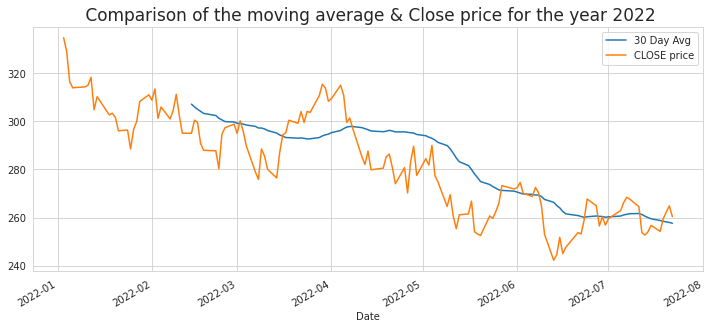

In [ ]:
sns.set_style('whitegrid')
f= plt.figure(figsize=(12,5))
stock['Close'].loc['2022-01-01': '2022-07-22'].rolling(window=30).mean().plot(label='30 Day Avg')
stock['Close'].loc['2022-01-01':'2022-07-31'].plot(label='CLOSE price')
plt.title(" Comparison of the moving average & Close price for the year 2022", fontsize=17)
plt.legend()

* Moving average for 10 Days

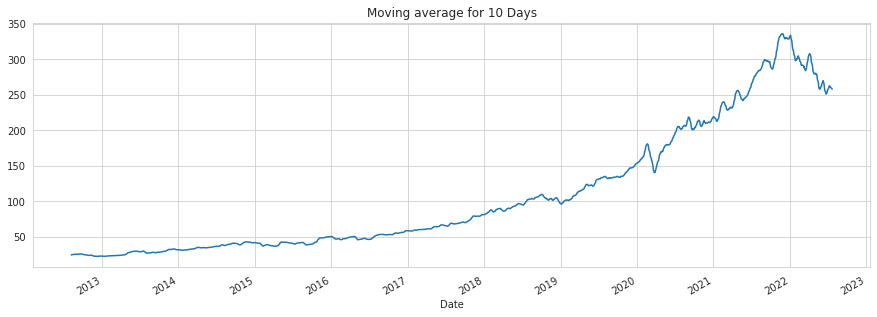

In [ ]:
plt.figure(figsize=(15,5))
ma_10 = stock['Adj Close'].rolling(10).mean()
ma_10.plot()
plt.title('Moving average for 10 Days');

* Moving average for 20 Days

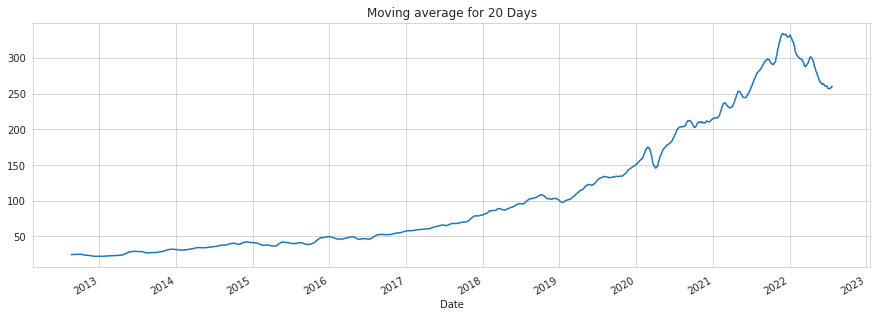

In [ ]:
plt.figure(figsize=(15,5))
ma_20 = stock['Adj Close'].rolling(20).mean()
ma_20.plot()
plt.title('Moving average for 20 Days');

* Moving average for 50 Days

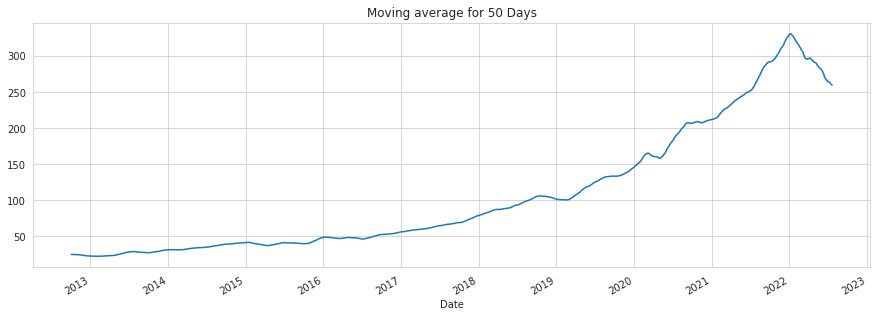

In [ ]:
plt.figure(figsize=(15,5))
ma_50 = stock['Adj Close'].rolling(50).mean()
ma_50.plot()
plt.title('Moving average for 50 Days');

In [ ]:
adj = stock['Adj Close']

* Comparison of Moving Averages with ADJ_CLOSE_PRICE

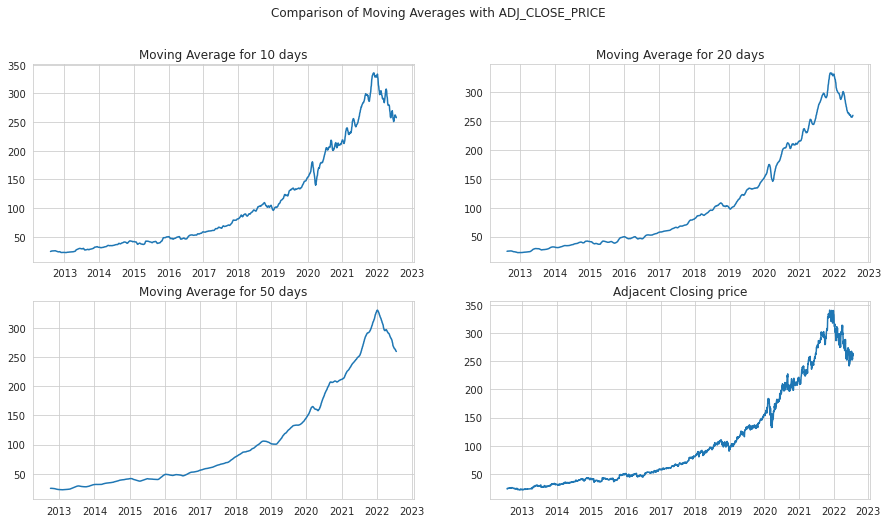

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_figheight(8)
fig.set_figwidth(15)
fig.suptitle('Comparison of Moving Averages with ADJ_CLOSE_PRICE')
ax1.plot(ma_10)
ax1.set_title('Moving Average for 10 days')
ax2.plot(ma_20)
ax2.set_title('Moving Average for 20 days')
ax3.plot(ma_50)
ax3.set_title('Moving Average for 50 days')
ax4.plot(adj)
ax4.set_title('Adjacent Closing price');

## Modelling

In [ ]:
x = stock.iloc[:, 0:5].values
y = stock.iloc[:, 4].values

In [ ]:
x.shape

(2515, 5)

In [ ]:
y.shape

(2515,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,  random_state=0)

In [ ]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [ ]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9999851511554788

In [ ]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}

In [ ]:
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 1, 'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 13, 'bootstrap': False}


In [ ]:
model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict.shape)

(503,)


In [ ]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 0.156
Mean Squared Error: 0.112
Root Mean Squared Error: 0.3347
(R^2) Score: 1.0
Train Score : 100.00% and Test Score : 100.00% using Random Tree Regressor.
Accuracy: 99.87 %.


In [ ]:
model_1 = SVR()
model_1.fit(x_train, y_train)
model_1.score(x_test, y_test)

0.992227049104561

In [ ]:
predict_1 = model_1.predict(x_test)
print(predict_1.shape)

(503,)


In [ ]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict_1), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict_1), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict_1)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict_1), 4))
print(f'Train Score : {model_1.score(x_train, y_train) * 100:.2f}% and Test Score : {model_1.score(x_test, y_test) * 100:.2f}% using Support Vector Regressor.')
errors_svr = abs(predict_1 - y_test)
mape_svr = 100 * (errors_svr / y_test)
accuracy_svr = 100 - np.mean(mape_svr)
print('Accuracy:', round(accuracy_svr, 2), '%.')

Mean Absolute Error: 2.6187
Mean Squared Error: 62.2868
Root Mean Squared Error: 7.8922
(R^2) Score: 0.9922
Train Score : 99.13% and Test Score : 99.22% using Support Vector Regressor.
Accuracy: 97.17 %.


In [ ]:
comp_df = pd.DataFrame()

In [ ]:
comp_df

,Model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,(R^2) Score,Accuracy
0,Random Forest Regressor,0.1560,0.1120,0.3347,1.0000,99.87
1,Support Vector Regressor,2.6187,62.2868,7.8922,0.9922,97.17


## Predictions

In [ ]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=stock.index[-1], periods=len(predict), freq="D"))

In [ ]:
predictions.head()

,Predictions
2022-07-22,208.737750
2022-07-23,56.095116
2022-07-24,61.022325
2022-07-25,295.599617
2022-07-26,37.965907


In [ ]:
predictions.to_csv("Predicted-price-data.csv")

In [ ]:
oneyear_df = pd.DataFrame(predictions[:252])
oneyear_df.to_csv("one-year-predictions.csv")

In [ ]:
onemonth_df = pd.DataFrame(predictions[:21])
onemonth_df.to_csv("one-month-predictions.csv")

### One Year Predictions

Buy price and date
     Unnamed: 0  Predictions
106  2022-11-05     22.23103
Sell price and date
    Unnamed: 0  Predictions
15  2022-08-06   339.432489


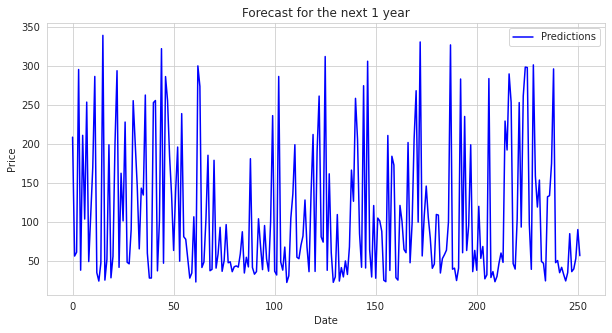

In [ ]:
oneyear_df_pred = pd.read_csv("one-year-predictions.csv")
#oneyear_df_pred.set_index("Date", inplace=True)
buy_price = min(oneyear_df_pred["Predictions"])
sell_price = max(oneyear_df_pred["Predictions"])
oneyear_buy = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(oneyear_buy)
print("Sell price and date")
print(oneyear_sell)
oneyear_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 year", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

### One Month Predictions

Buy price and date
    Unnamed: 0  Predictions
13  2022-08-04    24.001472 

Sell price and date
    Unnamed: 0  Predictions
15  2022-08-06   339.432489


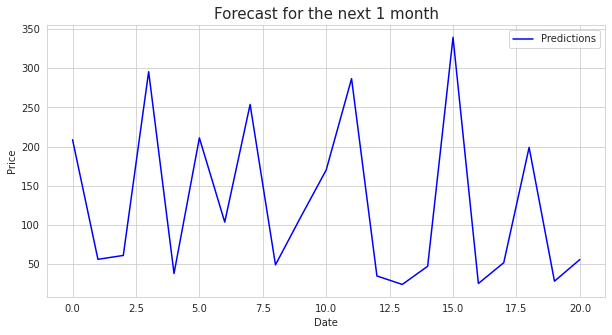

In [ ]:
onemonth_df_pred = pd.read_csv("one-month-predictions.csv")
buy_price = min(onemonth_df_pred["Predictions"])
sell_price = max(onemonth_df_pred["Predictions"])
onemonth_buy = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == buy_price]
onemonth_sell = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(onemonth_buy,'\n')
print("Sell price and date")
print(onemonth_sell)
onemonth_df_pred["Predictions"].plot(figsize=(10, 5), color="blue")
plt.title("Forecast for the next 1 month", size=15)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()